In [7]:

!pip install numpy pandas-profiling matplotlib seaborn --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvid

In [8]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 10.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [9]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [10]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mathipriyan
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 77.6MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [11]:
os.listdir('rossmann-store-sales')

['test.csv', 'train.csv', 'sample_submission.csv', 'store.csv']

In [12]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('./rossmann-store-sales/store.csv')
test_df = pd.read_csv('./rossmann-store-sales/test.csv')
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [13]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [14]:
merged_df=ross_df.merge(store_df,how='left',on='Store')
merged_test_df=test_df.merge(store_df,how='left',on='Store')

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [16]:
merged_df['day']=pd.to_datetime(merged_df.Date).dt.day

In [17]:
merged_df['month']=pd.to_datetime(merged_df.Date).dt.month
merged_df['year']=pd.to_datetime(merged_df.Date).dt.year

In [18]:
test_df['day']=pd.to_datetime(test_df.Date).dt.day
test_df['month']=pd.to_datetime(test_df.Date).dt.month
test_df['year']=pd.to_datetime(test_df.Date).dt.year

In [19]:
def splitdate(merged_df):
  merged_df['day']=pd.to_datetime(merged_df.Date).dt.day
  merged_df['month']=pd.to_datetime(merged_df.Date).dt.month
  merged_df['year']=pd.to_datetime(merged_df.Date).dt.year

In [20]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'day', 'month', 'year'],
      dtype='object')

In [21]:
merged_df.day

,day
0,31
1,31
2,31
3,31
4,31
...,...
1017204,1
1017205,1
1017206,1
1017207,1


In [22]:
merged_df=merged_df[merged_df['Open']==1].copy()

In [23]:
merged_df.shape

(844392, 21)

In [24]:
merged_df.CompetitionOpenSinceMonth

,CompetitionOpenSinceMonth
0,9.0
1,11.0
2,12.0
3,9.0
4,4.0
...,...
1016776,9.0
1016827,10.0
1016863,NaN
1017042,NaN


In [25]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.year - df.CompetitionOpenSinceYear) + (df.month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [26]:
splitdate(merged_test_df)
comp_months(merged_df)
comp_months(merged_test_df)

In [27]:
merged_df.CompetitionOpen

,CompetitionOpen
0,82.0
1,92.0
2,103.0
3,70.0
4,3.0
...,...
1016776,76.0
1016827,159.0
1016863,0.0
1017042,0.0


In [28]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [31]:
promo_cols(merged_df)
promo_cols(merged_test_df)

AttributeError: 'DataFrame' object has no attribute 'WeekOfYear'

In [30]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [32]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'day', 'month', 'year',
       'CompetitionOpen'],
      dtype='object')

In [33]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
              'day', 'month', 'year', 'Promo2']
target_col = 'Sales'

In [34]:
inputs=merged_df[input_cols].copy()
target=merged_df[target_col].copy()

In [35]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,day,month,year,Promo2
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,0
1016827,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,0
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,0


In [36]:
test_inputs=merged_test_df[input_cols].copy()

In [37]:
test_inputs.shape

(41088, 13)

In [38]:
inputs.shape

(844392, 13)

In [39]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday',
              'CompetitionDistance', 'CompetitionOpen', 'Promo2',
              'day', 'month', 'year']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [40]:
inputs[numeric_cols].isna().sum()

,0
Store,0
Promo,0
SchoolHoliday,0
CompetitionDistance,2186
CompetitionOpen,0
Promo2,0
day,0
month,0
year,0


In [41]:
max_distance=inputs['CompetitionDistance'].max()

In [42]:
inputs['CompetitionDistance']=inputs['CompetitionDistance'].fillna(max_distance*2)
test_inputs['CompetitionDistance']=test_inputs['CompetitionDistance'].fillna(max_distance*2)

In [43]:
inputs.isna().sum()

,0
Store,0
DayOfWeek,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpen,0
day,0


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler().fit(inputs[numeric_cols])
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(inputs[categorical_cols])

In [48]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
inputs[encoded_cols]=encoder.transform(inputs[categorical_cols])

In [49]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,day,month,year,Promo2,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,-1.732571,5,1.113726,0,2.041038,c,a,-0.423877,0.614306,1.746347,0.347258,1.502796,-0.997372,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.729462,5,1.113726,0,2.041038,a,a,-0.488851,0.767705,1.746347,0.347258,1.502796,1.002635,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.726354,5,1.113726,0,2.041038,a,a,0.769794,0.936443,1.746347,0.347258,1.502796,1.002635,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.723246,5,1.113726,0,2.041038,c,c,-0.484210,0.430228,1.746347,0.347258,1.502796,-0.997372,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.720138,5,1.113726,0,2.041038,a,a,2.234501,-0.597541,1.746347,0.347258,1.502796,-0.997372,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.384100,2,-0.897887,a,2.041038,b,a,-0.527835,0.522267,-1.708501,-1.457834,-1.070346,-0.997372,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016827,0.542617,2,-0.897887,a,2.041038,b,b,-0.461933,1.795475,-1.708501,-1.457834,-1.070346,-0.997372,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016863,0.654511,2,-0.897887,a,2.041038,b,b,-0.463789,-0.643561,-1.708501,-1.457834,-1.070346,1.002635,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017042,1.210876,2,-0.897887,a,2.041038,b,b,-0.409025,-0.643561,-1.708501,-1.457834,-1.070346,-0.997372,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [53]:
X=inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [52]:
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

In [54]:
X=inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [55]:
X

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,day,month,year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,-1.732571,1.113726,2.041038,-0.423877,0.614306,-0.997372,1.746347,0.347258,1.502796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.729462,1.113726,2.041038,-0.488851,0.767705,1.002635,1.746347,0.347258,1.502796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.726354,1.113726,2.041038,0.769794,0.936443,1.002635,1.746347,0.347258,1.502796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.723246,1.113726,2.041038,-0.484210,0.430228,-0.997372,1.746347,0.347258,1.502796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.720138,1.113726,2.041038,2.234501,-0.597541,-0.997372,1.746347,0.347258,1.502796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.384100,-0.897887,2.041038,-0.527835,0.522267,-0.997372,-1.708501,-1.457834,-1.070346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016827,0.542617,-0.897887,2.041038,-0.461933,1.795475,-0.997372,-1.708501,-1.457834,-1.070346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016863,0.654511,-0.897887,2.041038,-0.463789,-0.643561,1.002635,-1.708501,-1.457834,-1.070346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017042,1.210876,-0.897887,2.041038,-0.409025,-0.643561,-0.997372,-1.708501,-1.457834,-1.070346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [56]:
from xgboost import XGBRegressor

In [57]:
model=XGBRegressor(random_state=42,n_jobs=-1,n_estimators=20,max_depth=4)

In [58]:
model.fit(X,target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [59]:
preds=model.predict(X)

In [60]:
preds

array([8550.688 , 7520.644 , 8738.146 , ..., 8060.0234, 7303.235 ,
       9667.713 ], dtype=float32)

In [61]:
from sklearn.metrics import mean_squared_error
import math

In [62]:
def rmse(a, b):
    x= mean_squared_error(a, b)
    return math.sqrt(x)


In [63]:
rmse(target,preds)

2392.2532265627733

In [64]:
from xgboost import plot_tree

In [65]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

<Axes: >

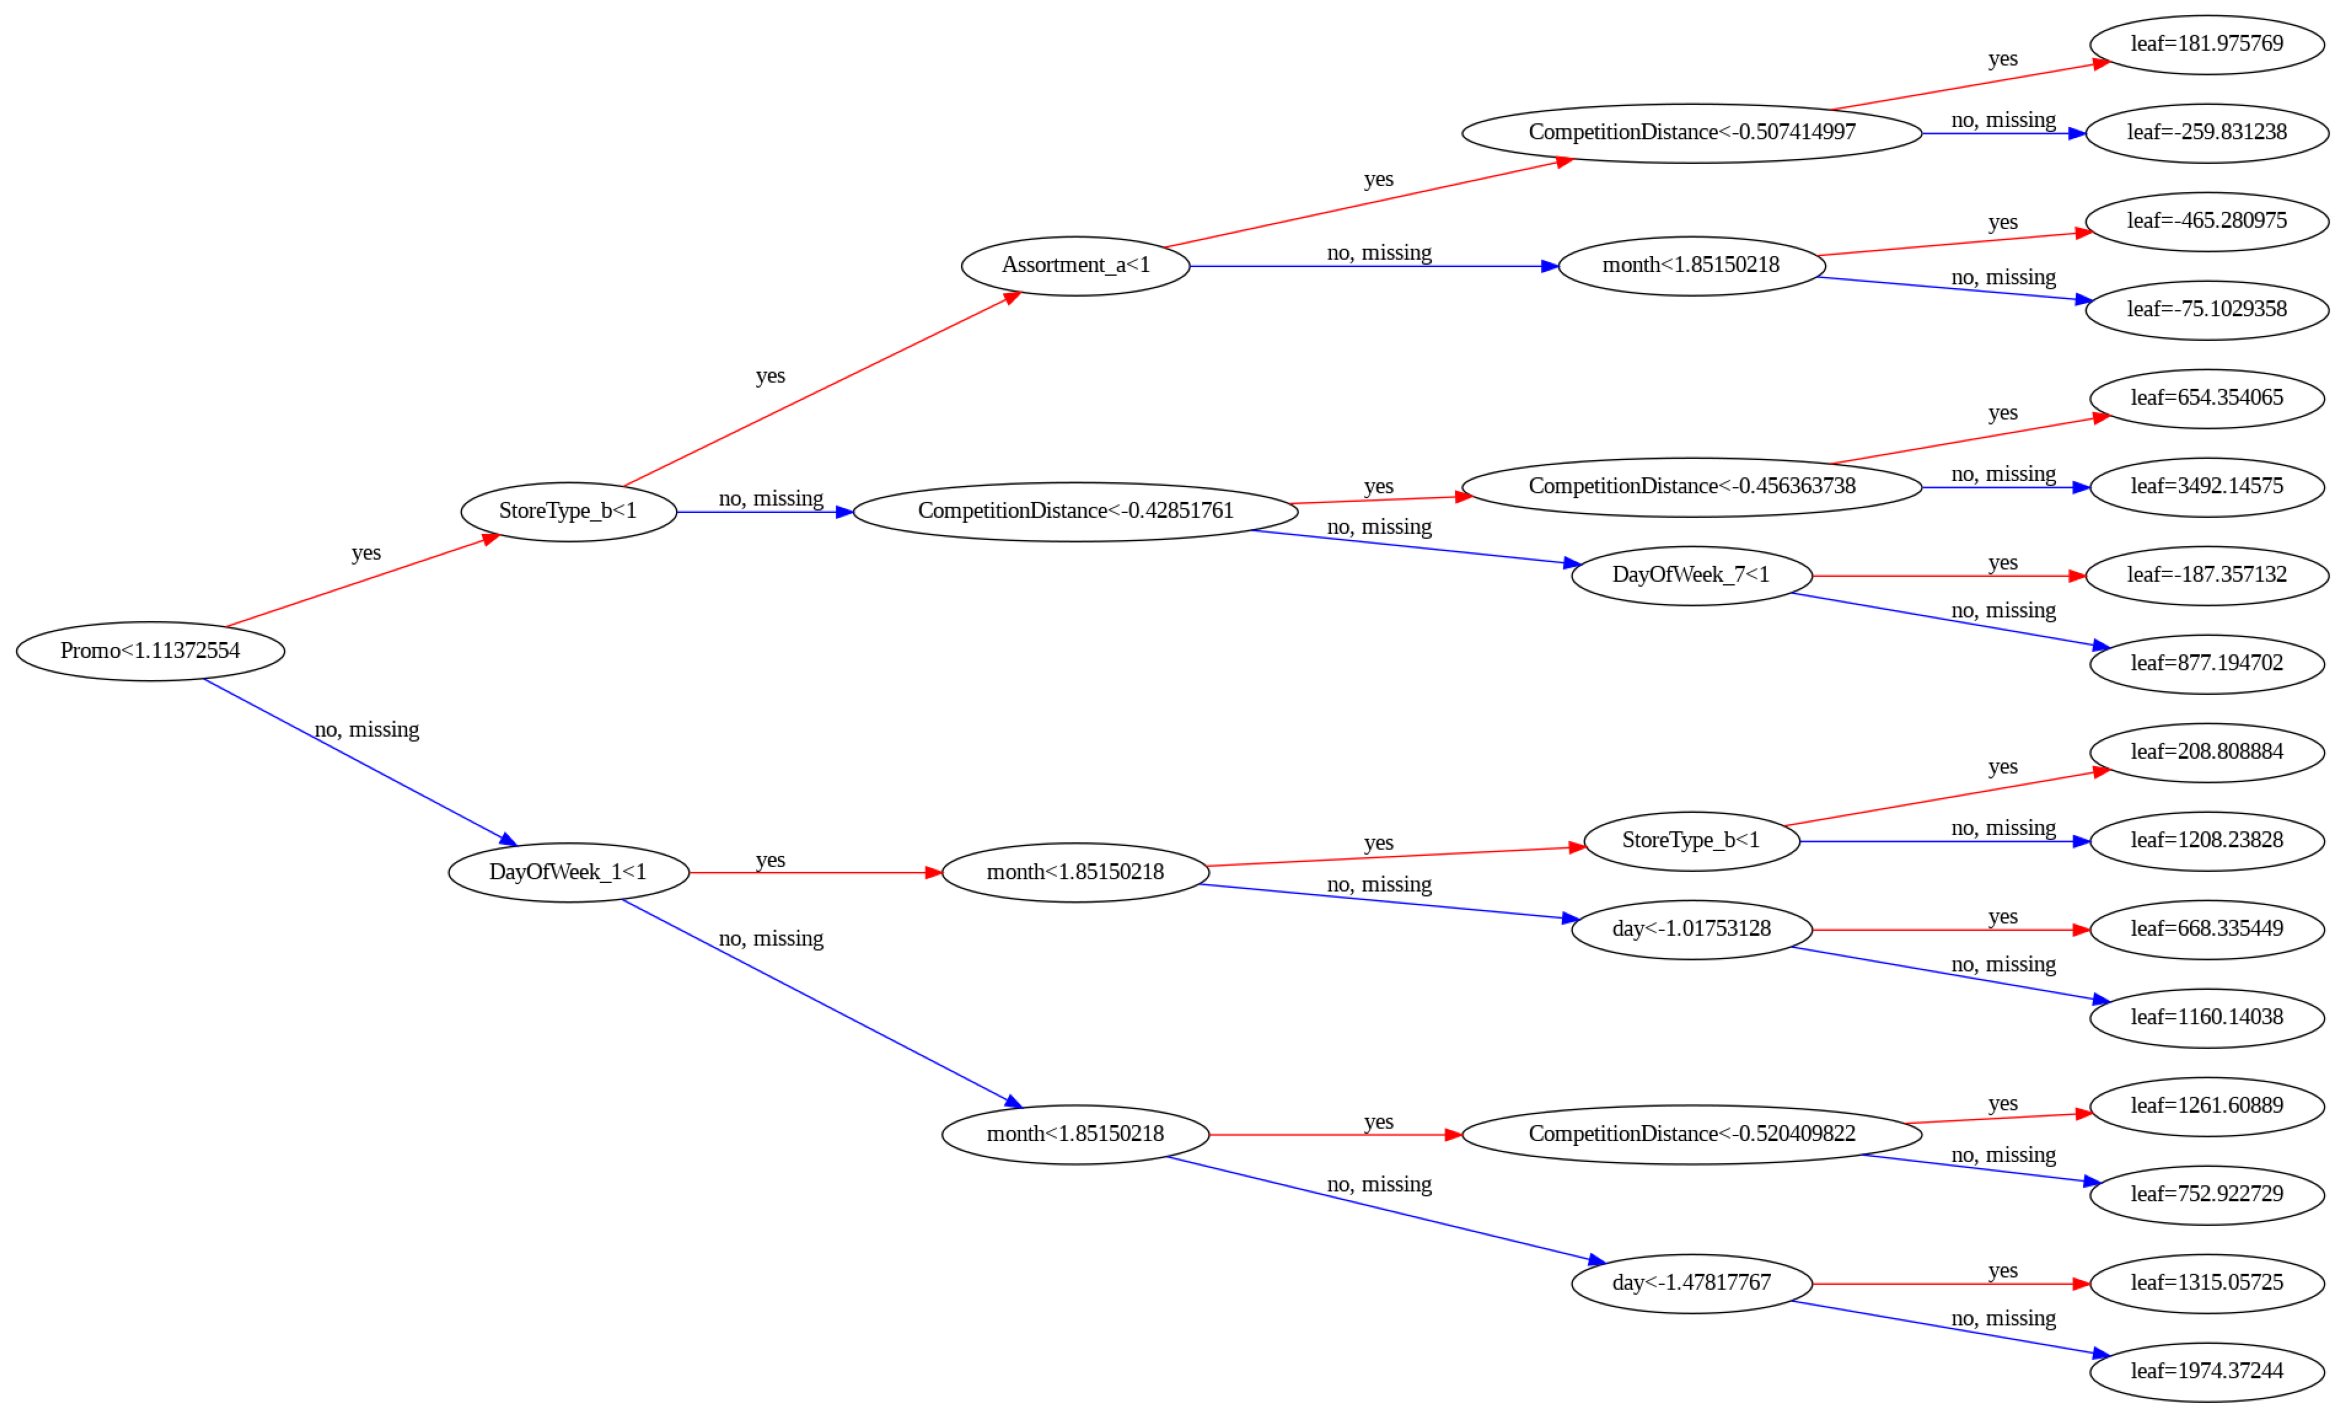

In [66]:
plot_tree(model,rankdir='LR',num_trees=0)

<Axes: >

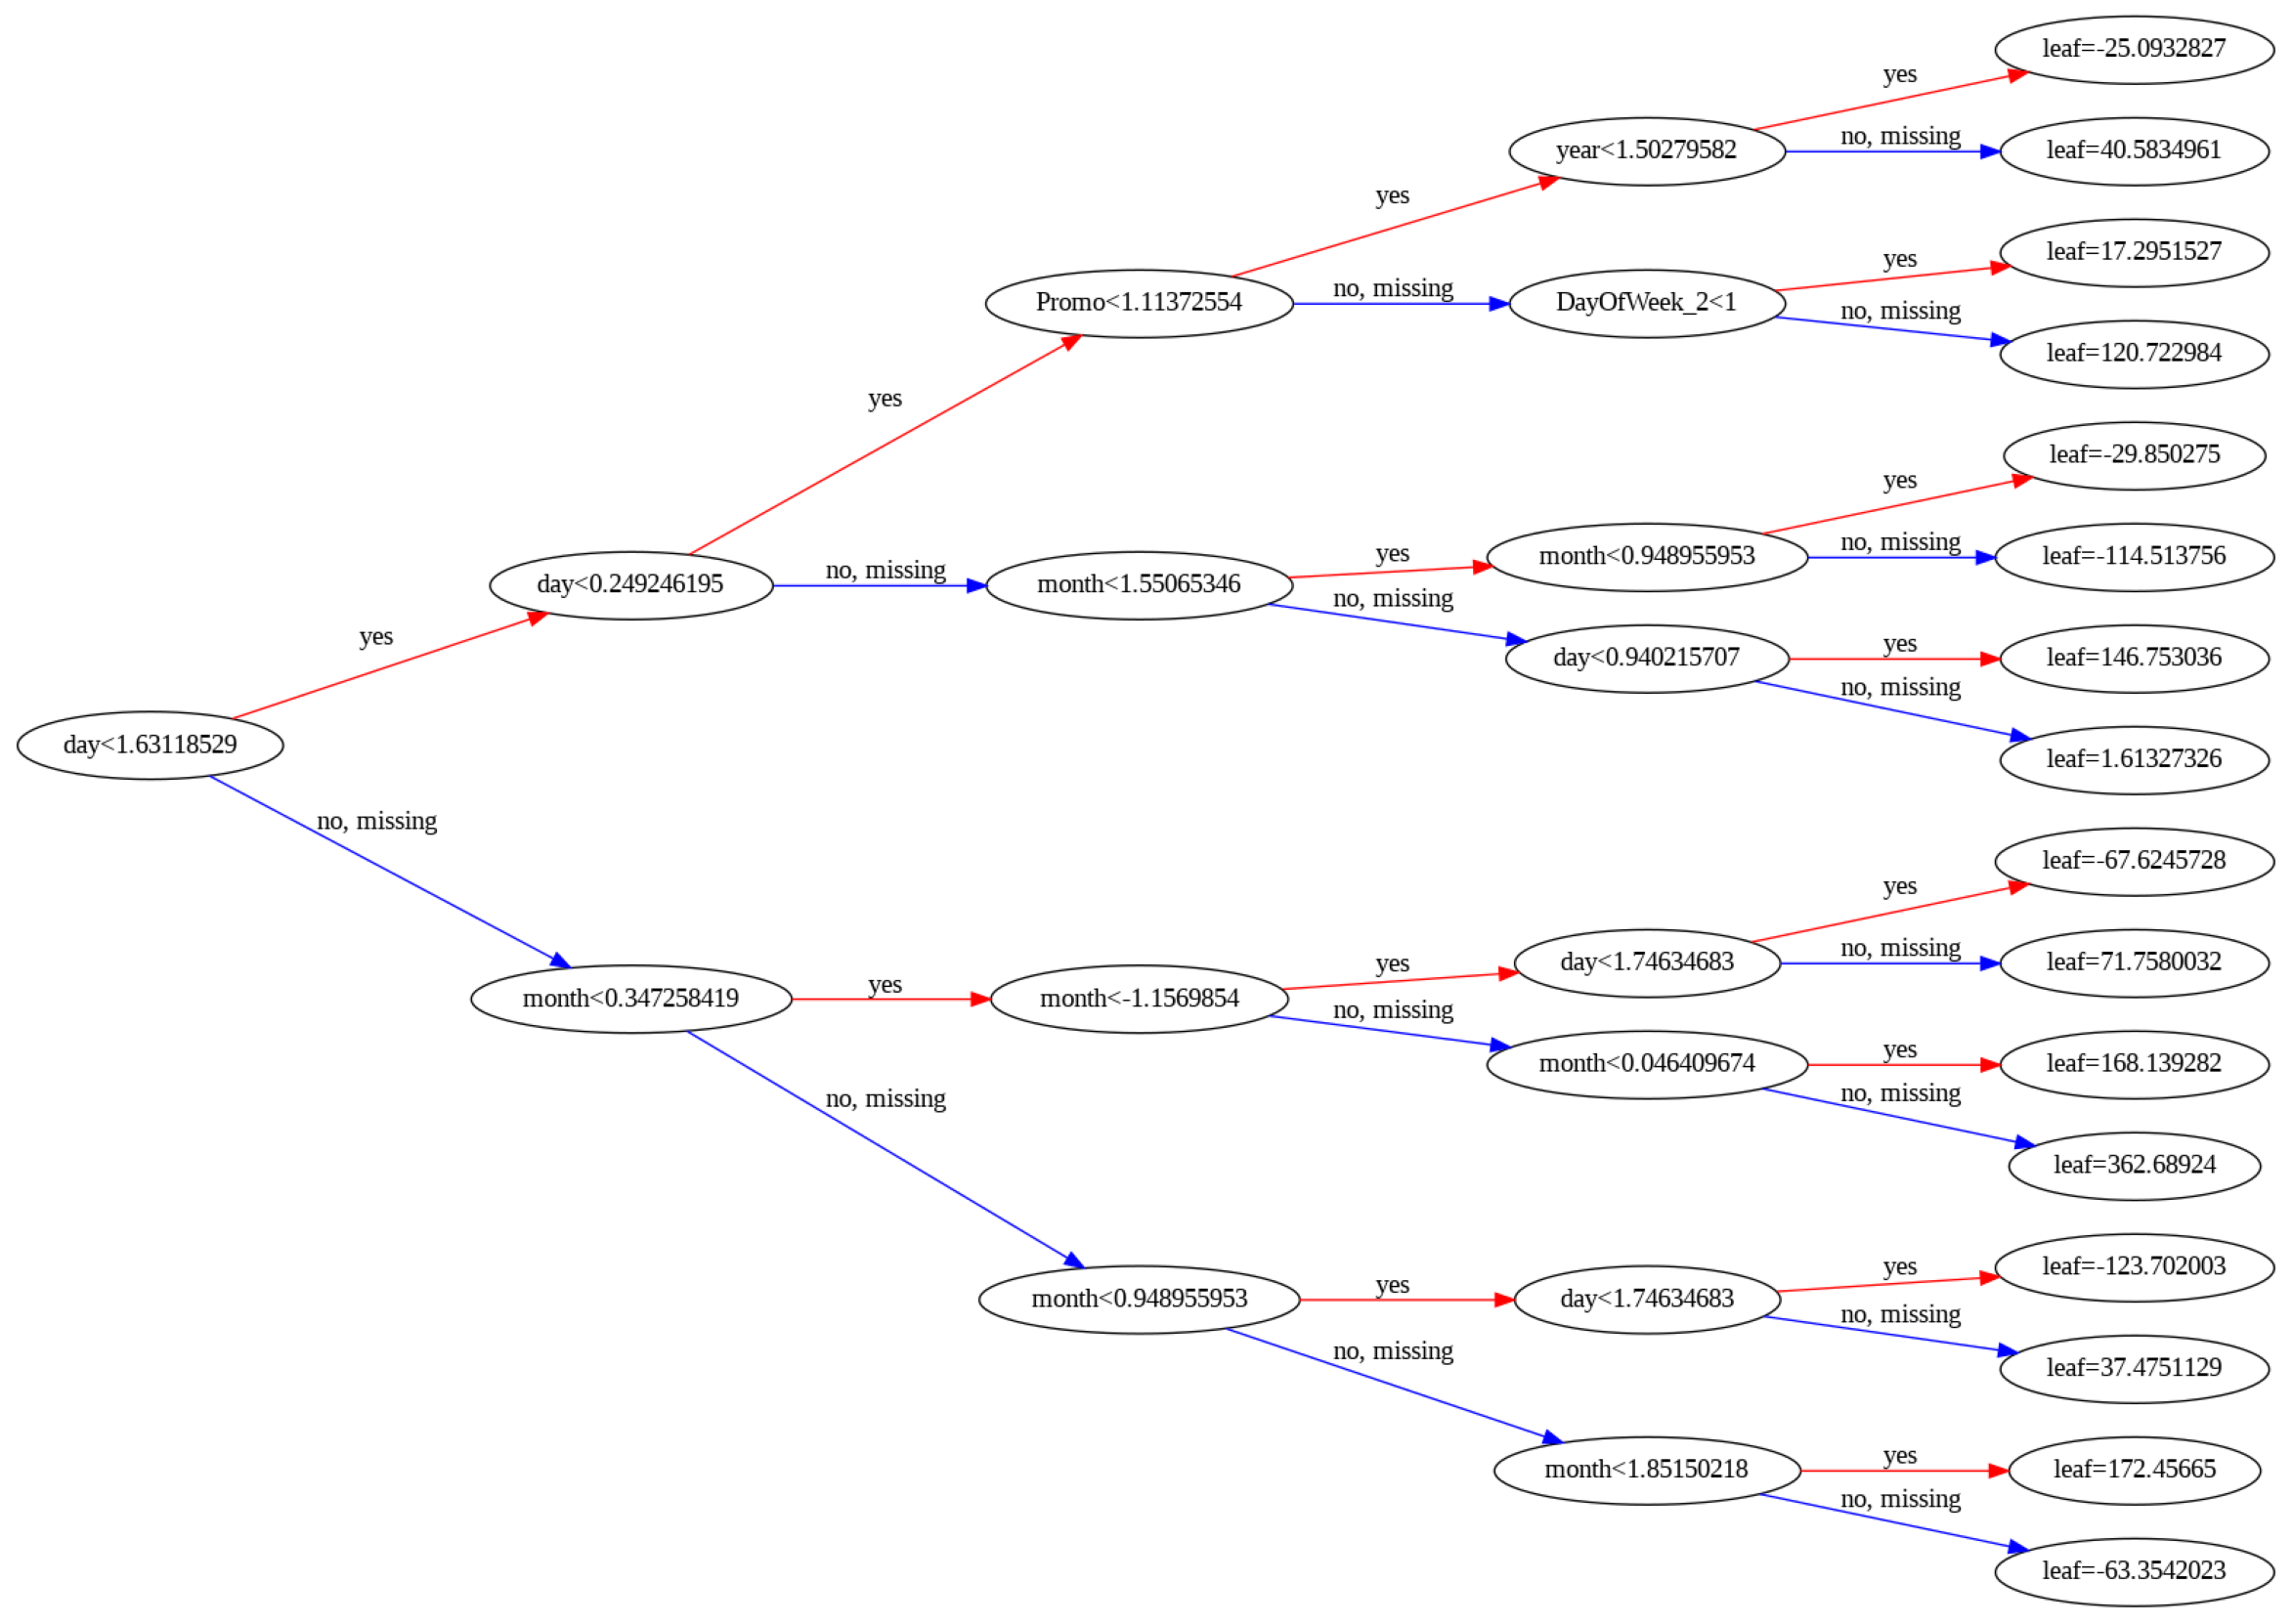

In [67]:
plot_tree(model,rankdir='LR',num_trees=19)

In [68]:
trees=model.get_booster().get_dump()

In [69]:
trees[0]

'0:[Promo<1.11372554] yes=1,no=2,missing=2\n\t1:[StoreType_b<1] yes=3,no=4,missing=4\n\t\t3:[Assortment_a<1] yes=7,no=8,missing=8\n\t\t\t7:[CompetitionDistance<-0.507414997] yes=15,no=16,missing=16\n\t\t\t\t15:leaf=181.975769\n\t\t\t\t16:leaf=-259.831238\n\t\t\t8:[month<1.85150218] yes=17,no=18,missing=18\n\t\t\t\t17:leaf=-465.280975\n\t\t\t\t18:leaf=-75.1029358\n\t\t4:[CompetitionDistance<-0.42851761] yes=9,no=10,missing=10\n\t\t\t9:[CompetitionDistance<-0.456363738] yes=19,no=20,missing=20\n\t\t\t\t19:leaf=654.354065\n\t\t\t\t20:leaf=3492.14575\n\t\t\t10:[DayOfWeek_7<1] yes=21,no=22,missing=22\n\t\t\t\t21:leaf=-187.357132\n\t\t\t\t22:leaf=877.194702\n\t2:[DayOfWeek_1<1] yes=5,no=6,missing=6\n\t\t5:[month<1.85150218] yes=11,no=12,missing=12\n\t\t\t11:[StoreType_b<1] yes=23,no=24,missing=24\n\t\t\t\t23:leaf=208.808884\n\t\t\t\t24:leaf=1208.23828\n\t\t\t12:[day<-1.01753128] yes=25,no=26,missing=26\n\t\t\t\t25:leaf=668.335449\n\t\t\t\t26:leaf=1160.14038\n\t\t6:[month<1.85150218] yes=13,n

In [70]:
importance_df=pd.DataFrame({'features':X.columns,'weights':model.feature_importances_}).sort_values(by='weights',ascending=False).head(10)
importance_df

,features,weights
1,Promo,0.356291
9,DayOfWeek_1,0.112820
21,StoreType_b,0.082952
24,Assortment_a,0.060587
3,CompetitionDistance,0.049079
5,Promo2,0.043530
0,Store,0.029024
7,month,0.027979
26,Assortment_c,0.026345
2,SchoolHoliday,0.025551


<Axes: xlabel='features', ylabel='weights'>

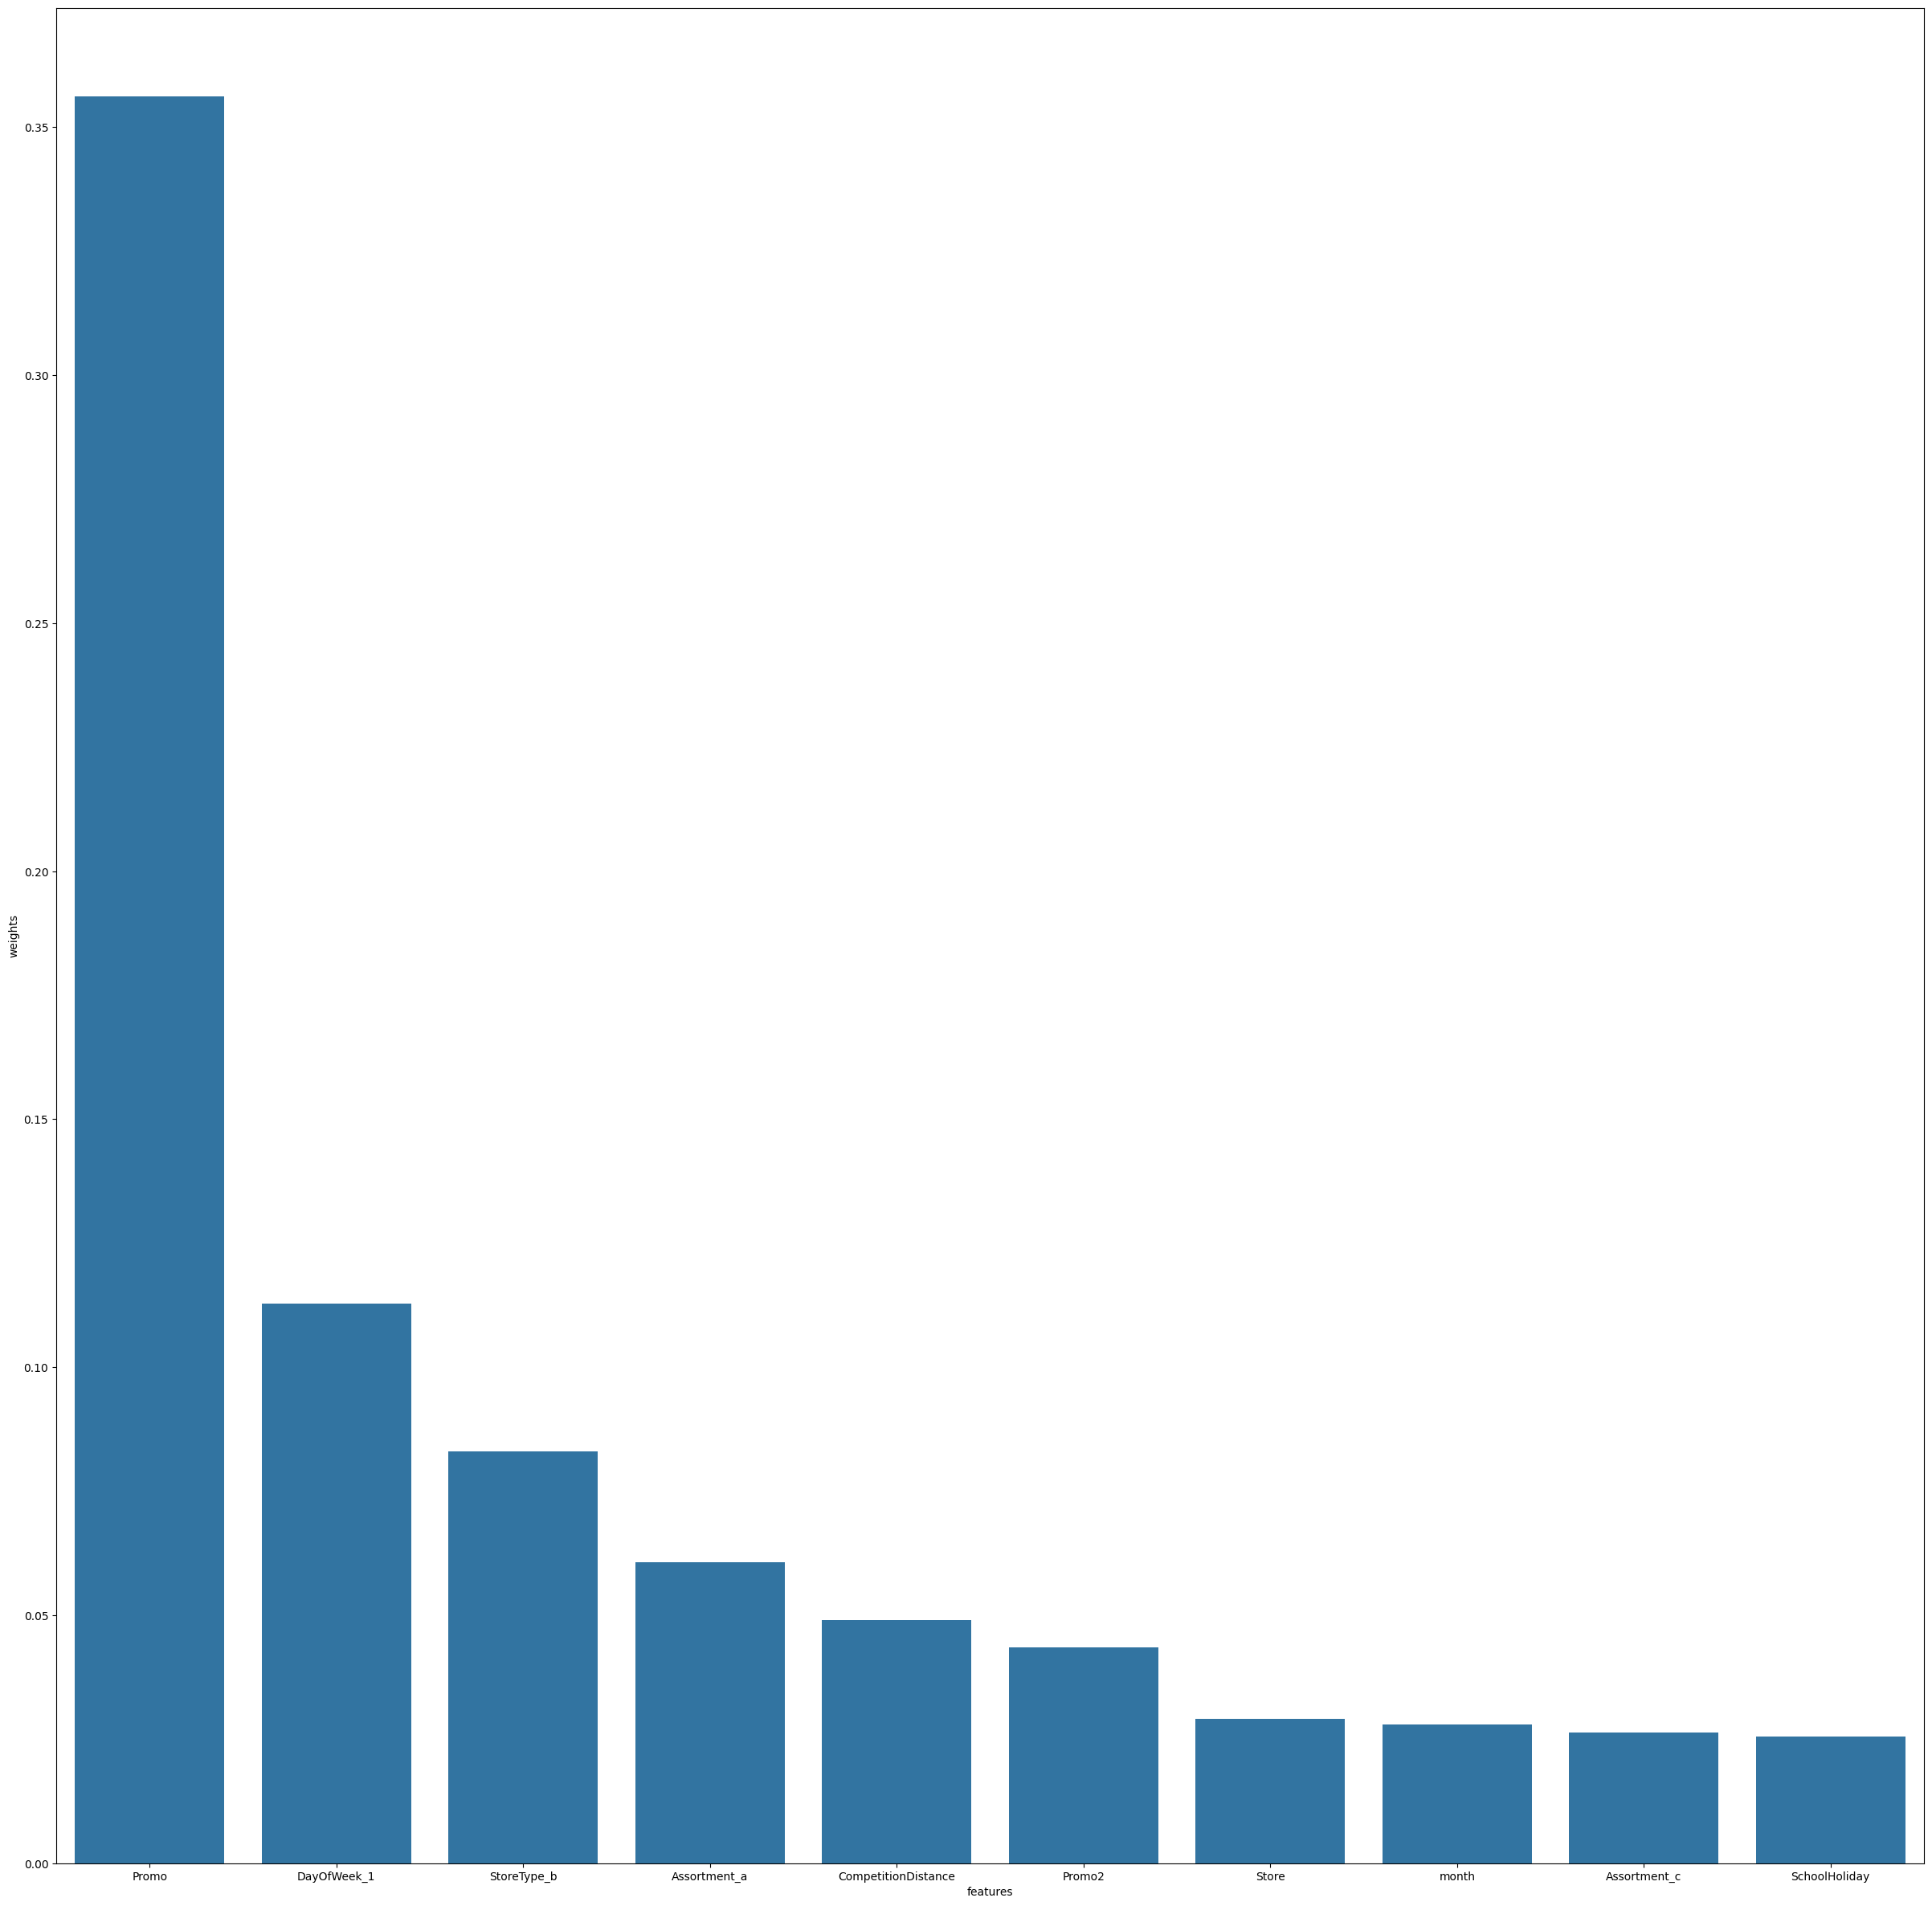

In [71]:
import seaborn as sns
sns.barplot(data=importance_df,x='features',y='weights')

In [72]:
from sklearn.model_selection import KFold


In [73]:
def train_and_eval(X_train,train_targets,X_val,val_targets,**params):
  model=XGBRegressor(random_state=42,n_jobs=-1,**params)
  model.fit(X_train,train_targets)
  train_rmse=rmse(train_targets,model.predict(X_train))
  val_rmse=rmse(val_targets,model.predict(X_val))
  return model,train_rmse,val_rmse

In [74]:
Kfold=KFold(n_splits=5)

In [75]:
models=[]
for train_idx,val_idx in Kfold.split(X):
  X_train,train_targets=X.iloc[train_idx],target.iloc[train_idx]
  val_train,val_targets=X.iloc[val_idx],target.iloc[val_idx]
  model,train_rmse,val_rmse=train_and_eval(X_train,train_targets,val_train,val_targets,max_depth=4,n_estimators=20)
  models.append(model)
  print("Train RMSE : {}, Validation RMSE : {}".format(train_rmse,val_rmse))


Train RMSE : 2399.35376716315, Validation RMSE : 2445.867739678497
Train RMSE : 2396.337517963611, Validation RMSE : 2449.4859664835803
Train RMSE : 2395.882927022938, Validation RMSE : 2361.495818332101
Train RMSE : 2386.270940190992, Validation RMSE : 2484.940944972335
Train RMSE : 2369.894301440467, Validation RMSE : 2401.6912790781416


In [78]:
import numpy as np
def predict(models,inputs):
  return np.mean([model.predict(inputs) for model in models],axis=0)

In [79]:
predict(models,X)

array([ 8215.766 ,  7642.6562,  8406.666 , ...,  7370.3896,  7390.893 ,
       10230.193 ], dtype=float32)